In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

### Import Data

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

# Concatenate both dataSet into one dataframe, so we only have to clean one dataframe.
df =pd.concat((train, test)).reset_index(drop=True)

df.drop('SalePrice',axis=1,inplace=True)
df.drop('Id',axis=1,inplace=True)

In [3]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Replacing 'NaN' Values.

Some of the features that have 'NaN' values, use 'NaN' to represent the lack of that feature. For example, feature 'PoolQC'
has 'NaN' values to represent the lack of a pool. Those 'NaN' value will be replaced with 'None'. The feature 'LotFrontage'
'NaN' values will be replaced with average values associated with their respective neighborhoods. Furthermore, the remaining
missing values will be replaced with the most common entry for that particular feature.

In [4]:
tempList = ['PoolQC','MiscFeature','GarageType','GarageYrBlt','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual',
            'Alley','Fence','BsmtExposure','MasVnrType','GarageFinish','GarageQual','FireplaceQu','GarageCond','MasVnrArea']
           
for element in tempList:
    df[element] = df[element].fillna("None")

In [5]:
x = df.groupby("Neighborhood")["LotFrontage"]
df["LotFrontage"] = x.transform(lambda element: element.fillna(element.mean()))

In [6]:
tempList = ['Electrical','KitchenQual','Functional','Utilities','MSZoning','Exterior1st','Exterior2nd',
            'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','TotalBsmtSF','GarageCars','GarageArea','BsmtFinSF2',
            'BsmtUnfSF','SaleType']

for element in tempList:
    df[element] = df[element].fillna(df[element].value_counts().index[0])

In [7]:
df.isnull().sum().sort_values(ascending=False).head(10)

YrSold         0
Foundation     0
ExterCond      0
ExterQual      0
Exterior1st    0
Exterior2nd    0
Fence          0
FireplaceQu    0
Fireplaces     0
FullBath       0
dtype: int64

### Converting string to numerical

In [8]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Identifying those categories that are strings.

In [9]:
x = df.columns
dataStorage=[]

for element in x:
    for element2 in df[element]:
        if type(element2)==str:
            dataStorage.append(element)

Converted dataStorage, features that are strings, to a numpy array in order to use the .unique() function.

In [10]:
x = np.array(dataStorage)
col = np.unique(x)

Created dummy variables from the string values.

In [11]:
final_data = pd.get_dummies(df,columns=col,drop_first=True)

Let's look at the data to make sure we no longer have strings.

In [12]:
final_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


There shouldn't be any more strings. Let's double check.

In [13]:
x = final_data.columns
for element in x:
    for element2 in final_data[element]:
        if type(element2)==str:
            print('There is a string value')

In [14]:
final_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


### Linear Regression Model

Determine dependent and independent variables.

In [15]:
# "final_data[:1460]" is the training data.
X = final_data[:1460]

y = train['SalePrice']

Train - Test Split your data.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=9)

Instantiate your LR model.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LR = LinearRegression()

Fit your model to training data.

In [20]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict using testing data.

In [21]:
y_pred = LR.predict(X_test)

Evaluate your model and Accuracy

In [22]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

37850.10218306318

In [23]:
print(LR.score(X_test, y_test)*100,'% Prediction Accuracy')

77.76556603998726 % Prediction Accuracy


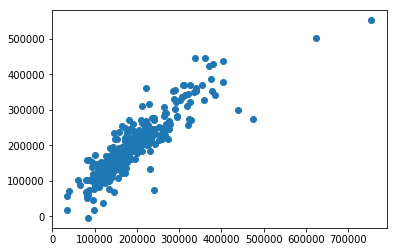

In [24]:
plt.scatter(y_test, y_pred)

Identifying 5 most influential features when determining a house valuation.

In [25]:
cdf = pd.DataFrame(LR.coef_,X.columns,columns=['Coefficient'])
cdf['Coefficient'].sort_values(ascending=False).head()

1stFlrSF            6.204202e+13
2ndFlrSF            6.204202e+13
LowQualFinSF        6.204202e+13
RoofMatl_Metal      1.408999e+05
MasVnrArea_816.0    1.258572e+05
Name: Coefficient, dtype: float64

### Evaluating Residuals

The residual follows a normal distribution pattern.

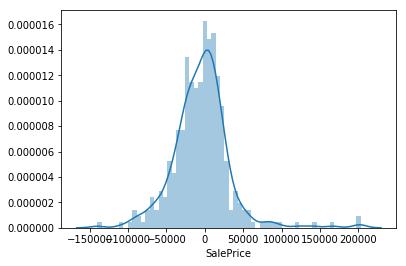

In [26]:
sns.distplot((y_test-y_pred),bins=60)

### House Valuation Prediction

Using the testing data, final_data[1460:] , we will now predict the housing valuation.

In [27]:
y_pred = LR.predict(final_data[1460:])

groundfloor = final_data['GrLivArea'][1460:]

Text(0,0.5,'Predicted Price')

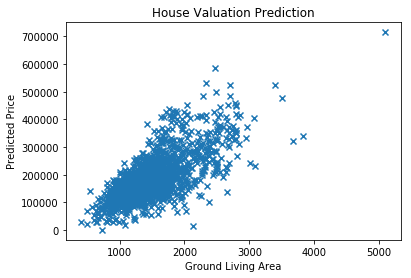

In [28]:
plt.scatter(groundfloor, y_pred,marker='x')
plt.title('House Valuation Prediction')
plt.xlabel('Ground Living Area')
plt.ylabel('Predicted Price')

### Improve Model, Boost Aggregation & Boosting

### Bootstrap Aggregating (Bagging)

In [29]:
# Instantiate model
bg = BaggingRegressor()

# Fit model to training data
bg.fit(X_train,y_train)

# Use model to create predictions
y_pred2 = bg.predict(X_test)

In [30]:
print(bg.score(X_test, y_test)*100,'% Prediction Accuracy')

86.34117355018894 % Prediction Accuracy


In [31]:
print('Bootstrap Aggregating increased the model accuracy by:', (bg.score(X_test, y_test) - LR.score(X_test, y_test))*100)

Bootstrap Aggregating increased the model accuracy by: 8.575607510201678


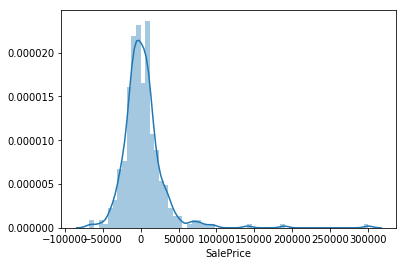

In [32]:
sns.distplot((y_test-y_pred2),bins=60)

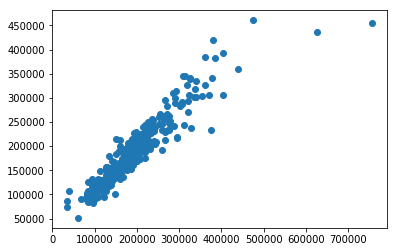

In [33]:
plt.scatter(y_test, y_pred2)

### Adaboost

In [34]:
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pred3 = adb.predict(X_test)

In [35]:
print(adb.score(X_test, y_test)*100,'% Prediction Accuracy')

83.40425144530403 % Prediction Accuracy


In [36]:
print('Adaboost increased the model accuracy by:', (adb.score(X_test, y_test) - LR.score(X_test, y_test))*100)

Adaboost increased the model accuracy by: 5.638685405316757


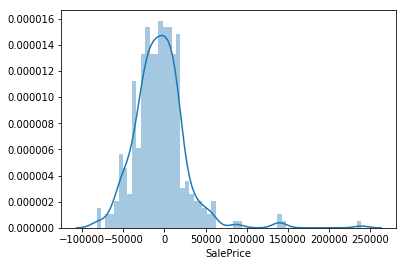

In [37]:
sns.distplot((y_test-y_pred3),bins=60)

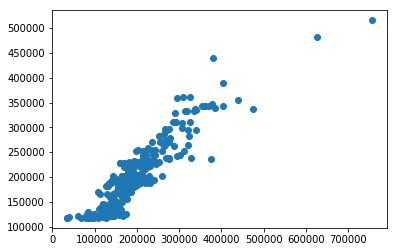

In [38]:
plt.scatter(y_test, y_pred3)